<a href="https://colab.research.google.com/github/Aryasreeg/Decision-tree-model/blob/main/pgrm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score


In [ ]:
dataset=pd.read_csv('diabetes - Copy.csv')

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
col_names=['preg','glucose','BP','Skin','Insulin','BMI','pedfn','age','label']

In [ ]:
dataset.columns=col_names

In [ ]:
dataset.head()

,preg,glucose,BP,Skin,Insulin,BMI,pedfn,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_cols=['preg','glucose','BP','Skin','Insulin','BMI','pedfn','age']

In [ ]:
x=dataset[feature_cols]

In [ ]:
y=dataset.label

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
y_train.value_counts(normalize=True)

0    0.651466
1    0.348534
Name: label, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.649351
1    0.350649
Name: label, dtype: float64

In [ ]:
x_train.shape,y_train.shape

((614, 8), (614,))

In [ ]:
x_test.shape,y_test.shape

((154, 8), (154,))

In [ ]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=101)

In [ ]:
model=model.fit(x_train,y_train) #to eliminate overfitting and underfitting

In [ ]:
x_train_pred=model.predict(x_train)


In [ ]:
train_acc=accuracy_score(y_train,x_train_pred)
print("accuracy of training value",train_acc)

accuracy of training value 0.8127035830618893


In [ ]:
x_test_pred=model.predict(x_test)

In [ ]:
test_acc=accuracy_score(y_test,x_test_pred)
print("accuracy of training value",test_acc)

accuracy of training value 0.7987012987012987


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print("accuracy", metrics.accuracy_score(y_test,y_pred))

accuracy 0.7987012987012987


[Text(169.93636363636367, 199.32, 'X[1] <= 154.5\nentropy = 0.933\nsamples = 614\nvalue = [400, 214]'),
 Text(71.01818181818183, 163.07999999999998, 'X[5] <= 26.75\nentropy = 0.818\nsamples = 515\nvalue = [384, 131]'),
 Text(20.290909090909093, 126.83999999999999, 'X[0] <= 2.5\nentropy = 0.244\nsamples = 124\nvalue = [119, 5]'),
 Text(10.145454545454546, 90.6, 'entropy = 0.0\nsamples = 70\nvalue = [70, 0]'),
 Text(30.436363636363637, 90.6, 'X[3] <= 14.0\nentropy = 0.445\nsamples = 54\nvalue = [49, 5]'),
 Text(20.290909090909093, 54.359999999999985, 'X[6] <= 0.22\nentropy = 0.625\nsamples = 32\nvalue = [27, 5]'),
 Text(10.145454545454546, 18.119999999999976, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(30.436363636363637, 18.119999999999976, 'entropy = 0.811\nsamples = 20\nvalue = [15, 5]'),
 Text(40.581818181818186, 54.359999999999985, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(121.74545454545455, 126.83999999999999, 'X[7] <= 30.5\nentropy = 0.907\nsamples = 391\n

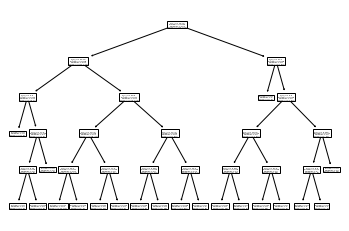

In [ ]:
tree.plot_tree(model)

In [ ]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Diabetes") 

'Diabetes.pdf'

In [ ]:
input_data=(1,89,66,23,94,28.1,0.167,21)#vlaues for each column for each attribute
input_data_as_numpy_array=np.asarray(input_data)

In [ ]:
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction=model.predict(input_data_reshaped)
if prediction[0]==0:
    print("not Diabetic")
else:
    print("Diabetic!!")

not Diabetic
